In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
#removing unwanted cols from train
del trainData['Name']
del trainData['Ticket']
trainData['totalMembers'] = trainData['SibSp'] + trainData['Parch']
del trainData['SibSp']
del trainData['Parch']
del trainData['Cabin']
del trainData['Embarked']
trainData.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Fare,totalMembers
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,1
2,3,1,3,female,26.0,7.9250,0
3,4,1,1,female,35.0,53.1000,1
4,5,0,3,male,35.0,8.0500,0
5,6,0,3,male,NaN,8.4583,0
6,7,0,1,male,54.0,51.8625,0
7,8,0,3,male,2.0,21.0750,4
8,9,1,3,female,27.0,11.1333,2
9,10,1,2,female,14.0,30.0708,1


In [4]:
#removing unwanted cols from test
del testData['Name']
del testData['Ticket']
testData['totalMembers'] = testData['SibSp'] + testData['Parch']
del testData['SibSp']
del testData['Parch']
del testData['Cabin']
del testData['Embarked']
testData.head(20)

,PassengerId,Pclass,Sex,Age,Fare,totalMembers
0,892,3,male,34.5,7.8292,0
1,893,3,female,47.0,7.0000,1
2,894,2,male,62.0,9.6875,0
3,895,3,male,27.0,8.6625,0
4,896,3,female,22.0,12.2875,2
5,897,3,male,14.0,9.2250,0
6,898,3,female,30.0,7.6292,0
7,899,2,male,26.0,29.0000,2
8,900,3,female,18.0,7.2292,0
9,901,3,male,21.0,24.1500,2


In [5]:
trainData.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             177
Fare              0
totalMembers      0
dtype: int64

In [6]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
Fare             1
totalMembers     0
dtype: int64

In [7]:
#cleaning Pclass for train Data
Pclass_1_avg_age = trainData[trainData['Pclass']==1]['Age'].median()
Pclass_2_avg_age = trainData[trainData['Pclass']==2]['Age'].median()
Pclass_3_avg_age = trainData[trainData['Pclass']==3]['Age'].median()

def fill_age(age):
    if str(age[5]).lower()=='nan':
        if age[2]==1:
            return Pclass_1_avg_age
        elif age[2]==2:
            return Pclass_2_avg_age
        else:
            return Pclass_3_avg_age
    else:
        return age[5]

trainData['Age']=trainData.apply(fill_age,axis=1)

In [8]:
#cleaning Pclass for test Data
Pclass_1_avg_age = testData[testData['Pclass']==1]['Age'].median()
Pclass_2_avg_age = testData[testData['Pclass']==2]['Age'].median()
Pclass_3_avg_age = testData[testData['Pclass']==3]['Age'].median()

def fill_age_test(age):
    if str(age[5]).lower()=='nan':
        if age[2]==1:
            return Pclass_1_avg_age
        elif age[2]==2:
            return Pclass_2_avg_age
        else:
            return Pclass_3_avg_age
    else:
        return age[5]

testData['Age']=testData.apply(fill_age_test,axis=1)
testData['Fare'].fillna(testData['Fare'].median(),inplace=True)

In [9]:
trainData.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
totalMembers    0
dtype: int64

In [10]:
testData.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
Fare            0
totalMembers    0
dtype: int64

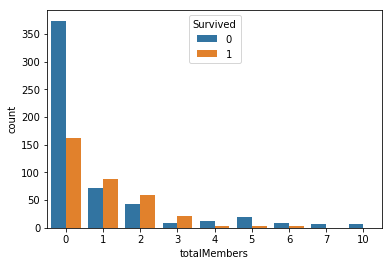

In [11]:
sns.countplot(x = "totalMembers", hue = "Survived", data = trainData)

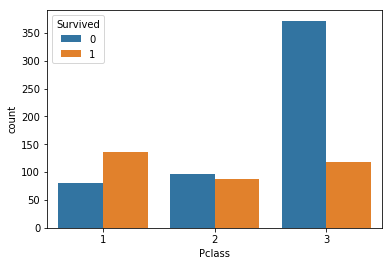

In [12]:
sns.countplot(x = "Pclass", hue = "Survived", data = trainData)

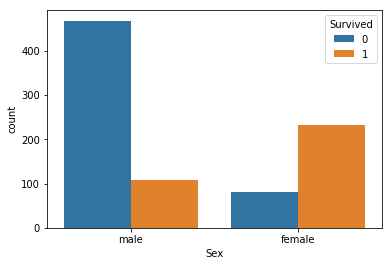

In [13]:
sns.countplot(x = "Sex", hue = "Survived", data = trainData)

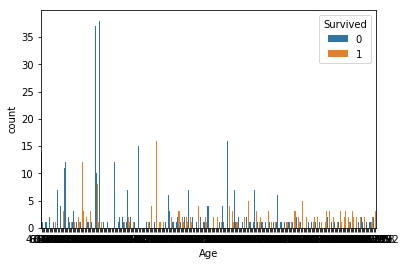

In [14]:
sns.countplot(x = "Age", hue = "Survived", data = trainData)

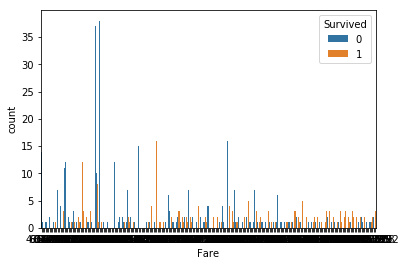

In [15]:
sns.countplot(x = "Fare", hue = "Survived", data = trainData)

In [16]:
#encoding sex to 0-1
le = LabelEncoder()
trainData['Sex']=le.fit_transform(trainData.Sex.values)
testData['Sex']=le.fit_transform(testData.Sex.values)

In [17]:
#Training Data
features = ["Pclass","Age","Sex","Fare","totalMembers"]
yTrain = trainData['Survived']
xTrain = trainData[features]
model = RandomForestClassifier()
model.fit(xTrain,yTrain)
model.score(xTrain,yTrain)

0.9057239057239057

In [18]:
xTrain.head()

,Pclass,Age,Sex,Fare,totalMembers
0,3,7.2500,1,7.2500,1
1,1,71.2833,0,71.2833,1
2,3,7.9250,0,7.9250,0
3,1,53.1000,0,53.1000,1
4,3,8.0500,1,8.0500,0


In [19]:
xTest = testData[features]
xTest.head()
pred = model.predict(xTest)

In [20]:
my_submission = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': pred})

In [21]:
my_submission.to_csv('submission.csv', index=False)